In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import thinkstats2
import thinkplot
from sklearn.feature_selection import VarianceThreshold
plt.style.use('fivethirtyeight')
from scipy import stats

In [44]:
train = pd.read_csv('G:/Desktop/datasets/flight-delays-spring-2018/flight_delays_train.csv')
test = pd.read_csv('G:/Desktop/datasets/flight-delays-spring-2018/flight_delays_test.csv')
train.head()

,Month,DayofMonth,DayOfWeek,DepTime,UniqueCarrier,Origin,Dest,Distance,dep_delayed_15min
0,c-8,c-21,c-7,1934,AA,ATL,DFW,732,N
1,c-4,c-20,c-3,1548,US,PIT,MCO,834,N
2,c-9,c-2,c-5,1422,XE,RDU,CLE,416,N
3,c-11,c-25,c-6,1015,OO,DEN,MEM,872,N
4,c-10,c-7,c-6,1828,WN,MDW,OMA,423,Y


# concat 

In [45]:
data = pd.concat([train,test])

C:\Users\Dindar\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


# preprocessing

In [46]:
d = {'N':0, 'Y':1}
data['dep_delayed_15min'] = data['dep_delayed_15min'].map(d)

In [47]:
d = {'c-7':7, 'c-3':3, 'c-5':5, 'c-6':6, 'c-4':4, 'c-2':2, 'c-1':1}
data['DayOfWeek'] = data['DayOfWeek'].map(d)

In [48]:
d = {'c-8':8, 'c-4':4, 'c-9':9, 'c-11':11, 'c-10':10, 'c-1':1, 'c-7':7, 'c-6':6, 'c-5':5,
       'c-3':3, 'c-12':12, 'c-2':2}
data['Month'] = data['Month'].map(d)

In [49]:
d = {'c-21':21, 'c-20':20, 'c-2':2, 'c-25':25, 'c-7':7, 'c-3':3, 'c-27':27, 'c-29':29,
       'c-28':28, 'c-5':5, 'c-6':6, 'c-10':10, 'c-19':19, 'c-26':26, 'c-14':14, 'c-22':22,
       'c-9':9, 'c-31':31, 'c-4':4, 'c-16':16, 'c-18':18, 'c-30':30, 'c-1':1, 'c-24':24,
       'c-15':15, 'c-17':17, 'c-8':8, 'c-12':12, 'c-13':13, 'c-11':11, 'c-23':23}
data['DayofMonth'] = data['DayofMonth'].map(d)

In [50]:
data.loc[(data['DepTime'] > 2361)&(data['DepTime'] < 2461),'DepTime'] = 59
data.loc[(data['DepTime'] > 2461)&(data['DepTime'] < 2561),'DepTime'] = 159

In [51]:
data['depTime']=0
data.loc[data['DepTime']<=61,'depTime']=1
data.loc[(data['DepTime']>61)&(data['DepTime']<=161),'depTime']=2
data.loc[(data['DepTime']>161)&(data['DepTime']<261),'depTime']=3
data.loc[(data['DepTime']>261)&(data['DepTime']<=361),'depTime']=4
data.loc[(data['DepTime']>361)&(data['DepTime']<=461),'depTime']=5
data.loc[(data['DepTime']>461)&(data['DepTime']<=561),'depTime']=6
data.loc[(data['DepTime']>561)&(data['DepTime']<=661),'depTime']=7
data.loc[(data['DepTime']>661)&(data['DepTime']<=761),'depTime']=8
data.loc[(data['DepTime']>761)&(data['DepTime']<=861),'depTime']=9
data.loc[(data['DepTime']>861)&(data['DepTime']<=961),'depTime']=10
data.loc[(data['DepTime']>961)&(data['DepTime']<=1061),'depTime']=11
data.loc[(data['DepTime']>1061)&(data['DepTime']<=1161),'depTime']=12
data.loc[(data['DepTime']>1161)&(data['DepTime']<=1261),'depTime']=13
data.loc[(data['DepTime']>1261)&(data['DepTime']<=1361),'depTime']=14
data.loc[(data['DepTime']>1361)&(data['DepTime']<=1461),'depTime']=15
data.loc[(data['DepTime']>1461)&(data['DepTime']<=1561),'depTime']=16
data.loc[(data['DepTime']>1561)&(data['DepTime']<=1661),'depTime']=17
data.loc[(data['DepTime']>1661)&(data['DepTime']<=1761),'depTime']=18
data.loc[(data['DepTime']>1761)&(data['DepTime']<=1861),'depTime']=19
data.loc[(data['DepTime']>1861)&(data['DepTime']<=1961),'depTime']=20
data.loc[(data['DepTime']>1961)&(data['DepTime']<=2061),'depTime']=21
data.loc[(data['DepTime']>2061)&(data['DepTime']<=2161),'depTime']=22
data.loc[(data['DepTime']>2161)&(data['DepTime']<=2261),'depTime']=23
data.loc[(data['DepTime']>2261)&(data['DepTime']<=2361),'depTime']=24

### in my dataset have only one feature is numeric. Others categorical values. Therefor i work only with Distance

In [52]:
data['Distance'].head()

0    732
1    834
2    416
3    872
4    423
Name: Distance, dtype: int64

In [53]:
data['Distance'].dtypes

dtype('int64')

In [54]:
data['Distance'].describe()

count    200000.000000
mean        726.263635
std         568.955768
min          30.000000
25%         319.000000
50%         575.000000
75%         954.000000
max        4962.000000
Name: Distance, dtype: float64

### Firstly, i check all distributions for my feature

## normal distribution

C:\Users\Dindar\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


((array([-4.49578239, -4.30333035, -4.19887063, ...,  4.19887063,
          4.30333035,  4.49578239]),
  array([  30,   31,   31, ..., 4962, 4962, 4962], dtype=int64)),
 (523.8220476040001, 726.263635, 0.9206536978060758))

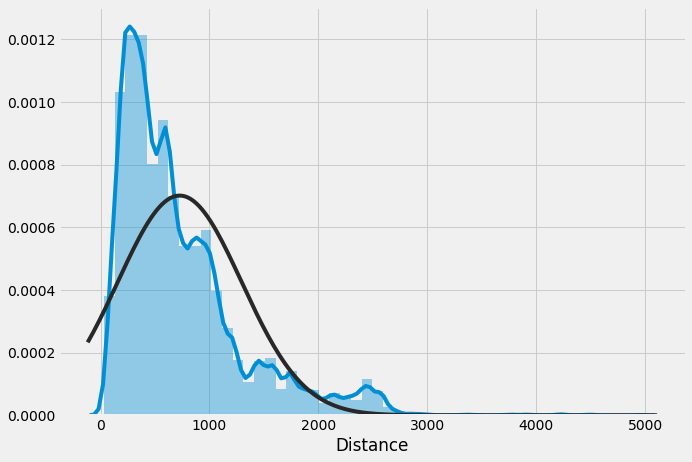

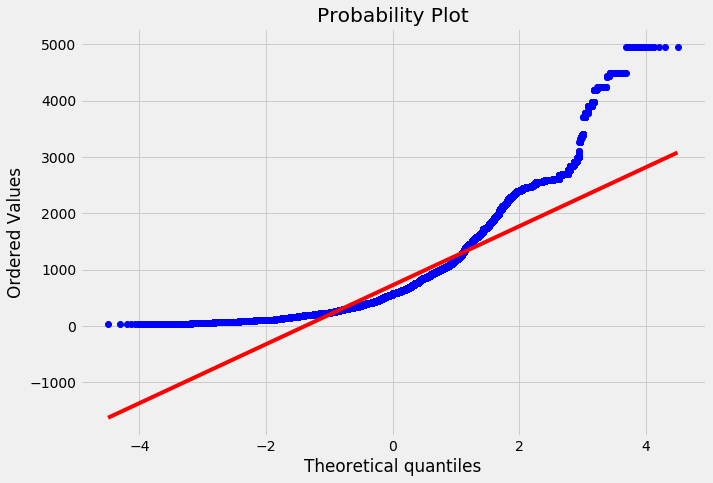

In [55]:
plt.figure(figsize=(10, 7))
sns.distplot(data['Distance'], fit=stats.norm)
plt.figure(figsize=(10, 7))
stats.probplot(data['Distance'], plot=plt)

## lognorm

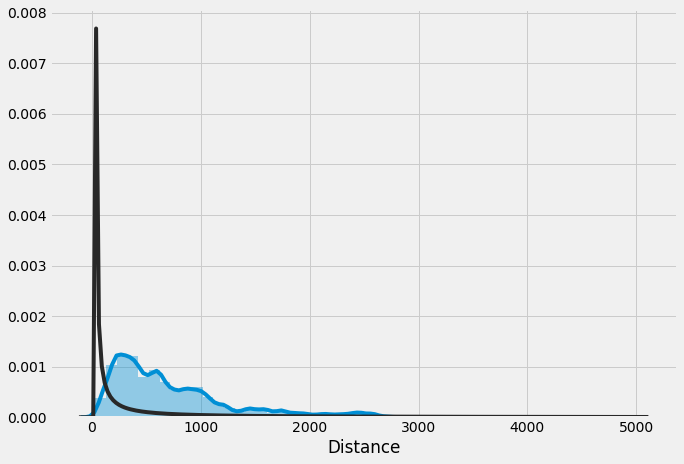

In [57]:
plt.figure(figsize=(10, 7))
sns.distplot(data['Distance'], fit=stats.lognorm)

### I check to lognorm distribution. It is seen as lognorm distribution

((array([-4.49578239, -4.30333035, -4.19887063, ...,  4.19887063,
          4.30333035,  4.49578239]),
  array([3.40119738, 3.4339872 , 3.4339872 , ..., 8.50956416, 8.50956416,
         8.50956416])),
 (0.778142067347109, 6.3019328715156675, 0.9972156949120073))

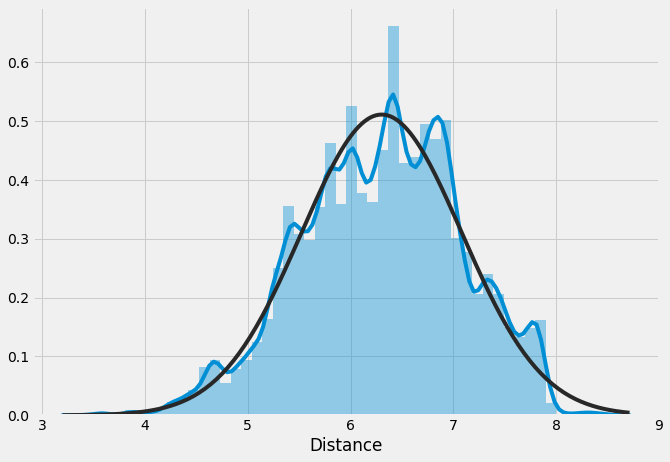

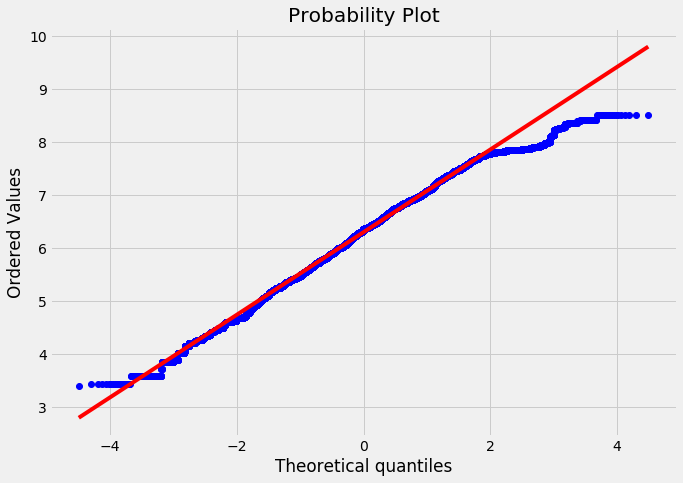

In [58]:
plt.figure(figsize=(10, 7))
sns.distplot(np.log(data['Distance']), fit=stats.norm)
plt.figure(figsize=(10, 7))
stats.probplot(np.log(data['Distance']), plot=plt)

## expon

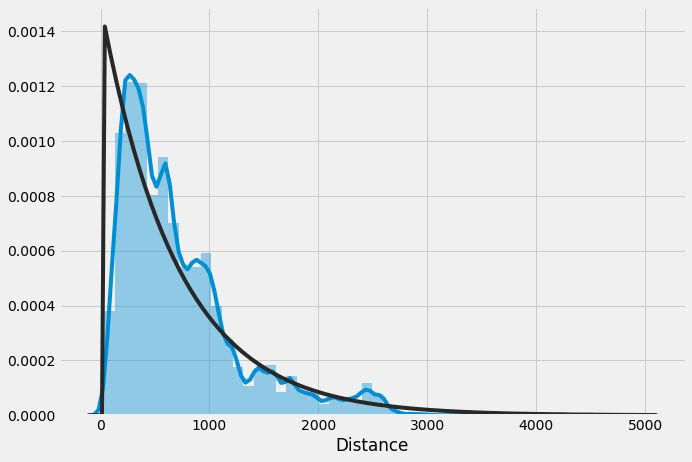

In [59]:
plt.figure(figsize=(10, 7))
sns.distplot(data['Distance'], fit=stats.expon)

{'xscale': 'linear', 'yscale': 'linear'}

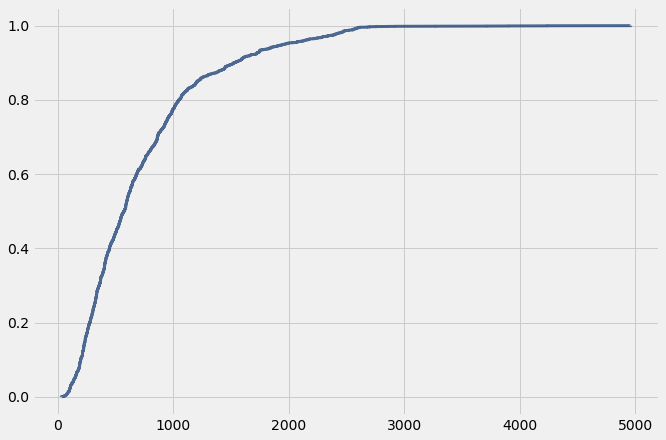

In [60]:
plt.figure(figsize=(10, 7))
thinkplot.Cdf(thinkstats2.Cdf(data['Distance']))

### Distance not distributed EXPON. Because, expon distribution must be as straight line in CCDF

No handles with labels found to put in legend.


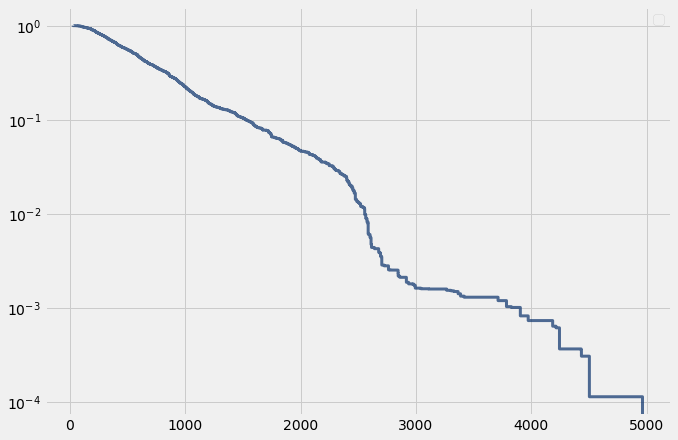

In [61]:
plt.figure(figsize=(10, 7))
thinkplot.Cdf(thinkstats2.Cdf(data['Distance']), complement=True)
thinkplot.Config(yscale='log', loc='upper right')

## pareto

C:\Users\Dindar\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\Dindar\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:2305: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu


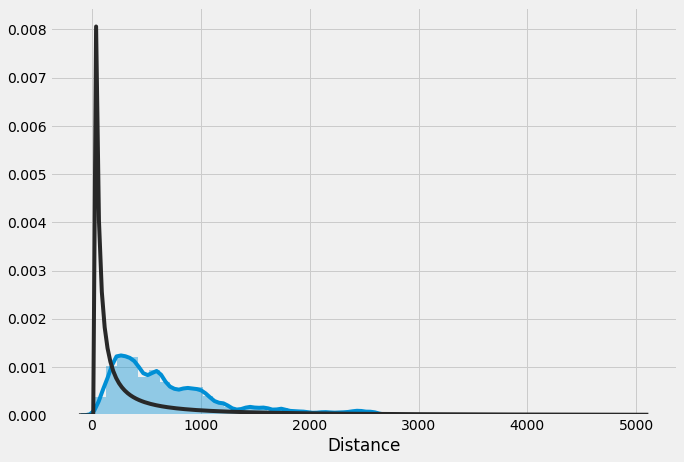

In [62]:
plt.figure(figsize=(10, 7))
sns.distplot(data['Distance'], fit=stats.pareto)

# in the end i decide that our feature distributed as lognormal

In [63]:
data['Distance'] = np.log(data['Distance'])

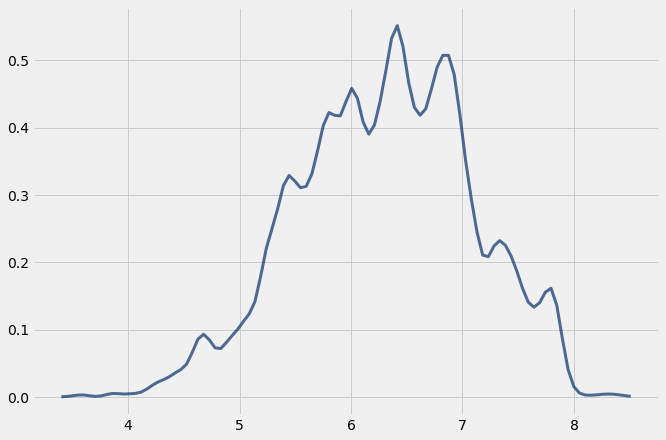

In [64]:
plt.figure(figsize=(10, 7))
thinkplot.Pdf(thinkstats2.EstimatedPdf(data['Distance']))

In [65]:
yes_cdf = thinkstats2.Cdf(data[data['dep_delayed_15min'] == 1.0]['Distance'], label='1')
no_cdf = thinkstats2.Cdf(data[data['dep_delayed_15min'] == 0.0]['Distance'],  label='0')

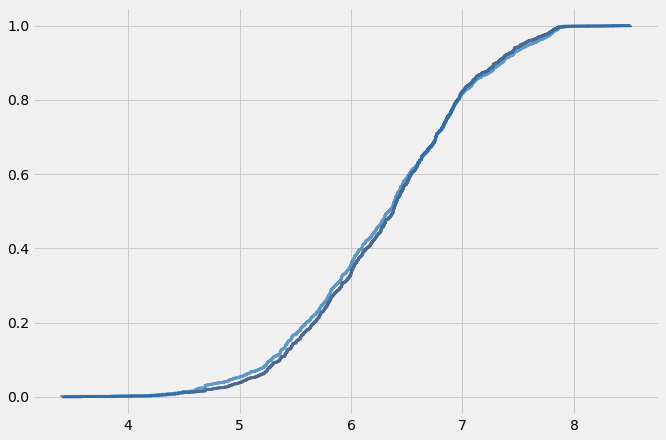

In [66]:
plt.figure(figsize=(10, 7))
thinkplot.Cdfs([yes_cdf, no_cdf])